<a href="https://colab.research.google.com/github/he16946/Assignment2020/blob/main/Assignment2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson's Classification

## Info 

---



This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). *Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column)*. The main aim of the data is to discriminate healthy people from those with PD, **according to "status" column which is set to 0 for healthy and 1 for PD**.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. *There are around six recordings per patient, the name of the patient is identified in the first column*.



---



### Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status

**Health status of the subject (one) - Parkinson's, (zero) - healthy**

RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


---



##imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cbook
from sklearn import svm, tree, metrics

from sklearn.model_selection import (cross_validate, cross_val_score,
                                     RepeatedStratifiedKFold, GridSearchCV,
                                     train_test_split)
from sklearn.metrics import (make_scorer, accuracy_score,mean_absolute_error,
                             classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier

### Data 

#### Examining Data 

Reading data file and creating a DataFrame to store the data in. Then identify  data type and name of each column. 

In [57]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_copy = df

In [ ]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Explore the nature of data, looking at first 30 and a brief description of each column. 

In [ ]:
df.head(30)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0   phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1   phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2   phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3   phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4   phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
5   phon_R01_S01_6      120.552       131.162  ...  0.299111  2.187560  0.357775
6   phon_R01_S02_1      120.267       137.244  ...  0.257682  1.854785  0.211756
7   phon_R01_S02_2      107.332       113.840  ...  0.183721  2.064693  0.163755
8   phon_R01_S02_3       95.730       132.068  ...  0.327769  2.322511  0.231571
9   phon_R01_S02_4       95.056       120.103  ...  0.325996  2.432792  0.271362
10  phon_R01_S02_5       88.333       112.240  ...  0.391002  2.407313  0.249740
11  phon_R01_S02_6       91.904       115.871  ...  0.363566  2.642476  0.275931
12  phon_R01_S04_1      136.926       159.866  ...  0.152813  2.041277  0.138512
13  phon_R01_S04_2      139.173       179.139  ...  0.254989  2.519422  0.199889
14  phon_R01_S04_3      152.845       163.305  ...  0.203653  2.125618  0.170100
15  phon_R01_S04_4      142.167       217.455  ...  0.210185  2.205546  0.234589
16  phon_R01_S04_5      144.188       349.259  ...  0.239764  2.264501  0.218164
17  phon_R01_S04_6      168.778       232.181  ...  0.434326  3.007463  0.430788
18  phon_R01_S05_1      153.046       175.829  ...  0.357870  3.109010  0.377429
19  phon_R01_S05_2      156.405       189.398  ...  0.340176  2.856676  0.322111
20  phon_R01_S05_3      153.848       165.738  ...  0.262564  2.739710  0.365391
21  phon_R01_S05_4      153.880       172.860  ...  0.237622  2.557536  0.259765
22  phon_R01_S05_5      167.930       193.221  ...  0.262384  2.916777  0.285695
23  phon_R01_S05_6      173.917       192.735  ...  0.210279  2.547508  0.253556
24  phon_R01_S06_1      163.656       200.841  ...  0.220890  2.692176  0.215961
25  phon_R01_S06_2      104.400       206.002  ...  0.236853  2.846369  0.219514
26  phon_R01_S06_3      171.041       208.313  ...  0.226278  2.589702  0.147403
27  phon_R01_S06_4      146.845       208.701  ...  0.196102  2.314209  0.162999
28  phon_R01_S06_5      155.358       227.383  ...  0.279789  2.241742  0.108514
29  phon_R01_S06_6      162.568       198.346  ...  0.209866  1.957961  0.135242

[30 rows x 24 columns]

In [ ]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

Check the class imbalance present in the data and visually represent the class distribution. 

In [58]:
#how imbalanced is the data?

print('Positive', round(df['status'].value_counts()[1]/len(df) * 100,2),'% of the dataset')
print('Healthy', round(df['status'].value_counts()[0]/len(df) * 100,2), '% of the dataset')

Positive 75.38 % of the dataset
Healthy 24.62 % of the dataset


Text(0.5, 1.0, 'Observe status distribution')

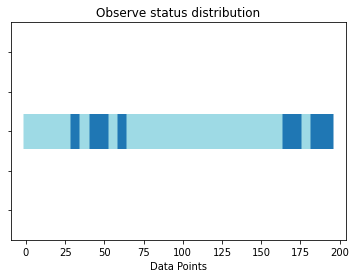

In [67]:
# Observing status distribution by taking random samples of data frame 

fig1, ax1 = plt.subplots()

ax1.scatter(range(len(df['status'])),  [1] * len(df['status']), 
            c=df['status'], marker='_', lw=35, cmap='tab20')

ax1.set_yticklabels([])
plt.xlabel('Data Points')
ax1.set_title('Observe status distribution')

Represent distribution of each column (feature) and the relation connecting them. A heatmap indicates the correlation coefficient value between features. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb96ec33d30>,
      dtype=object)

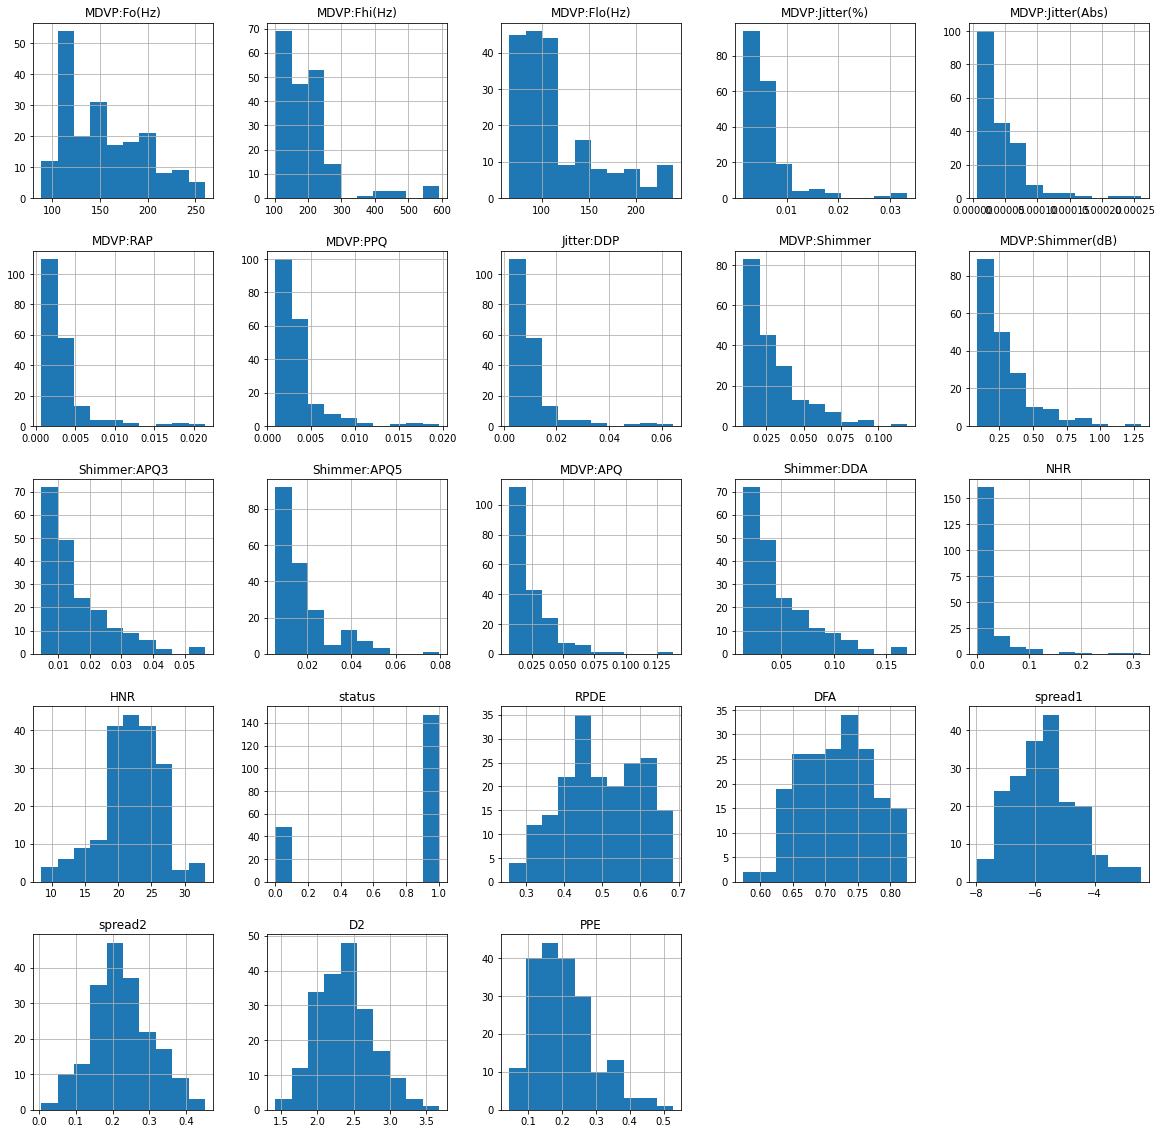

In [ ]:
df.hist(figsize = (20,20))

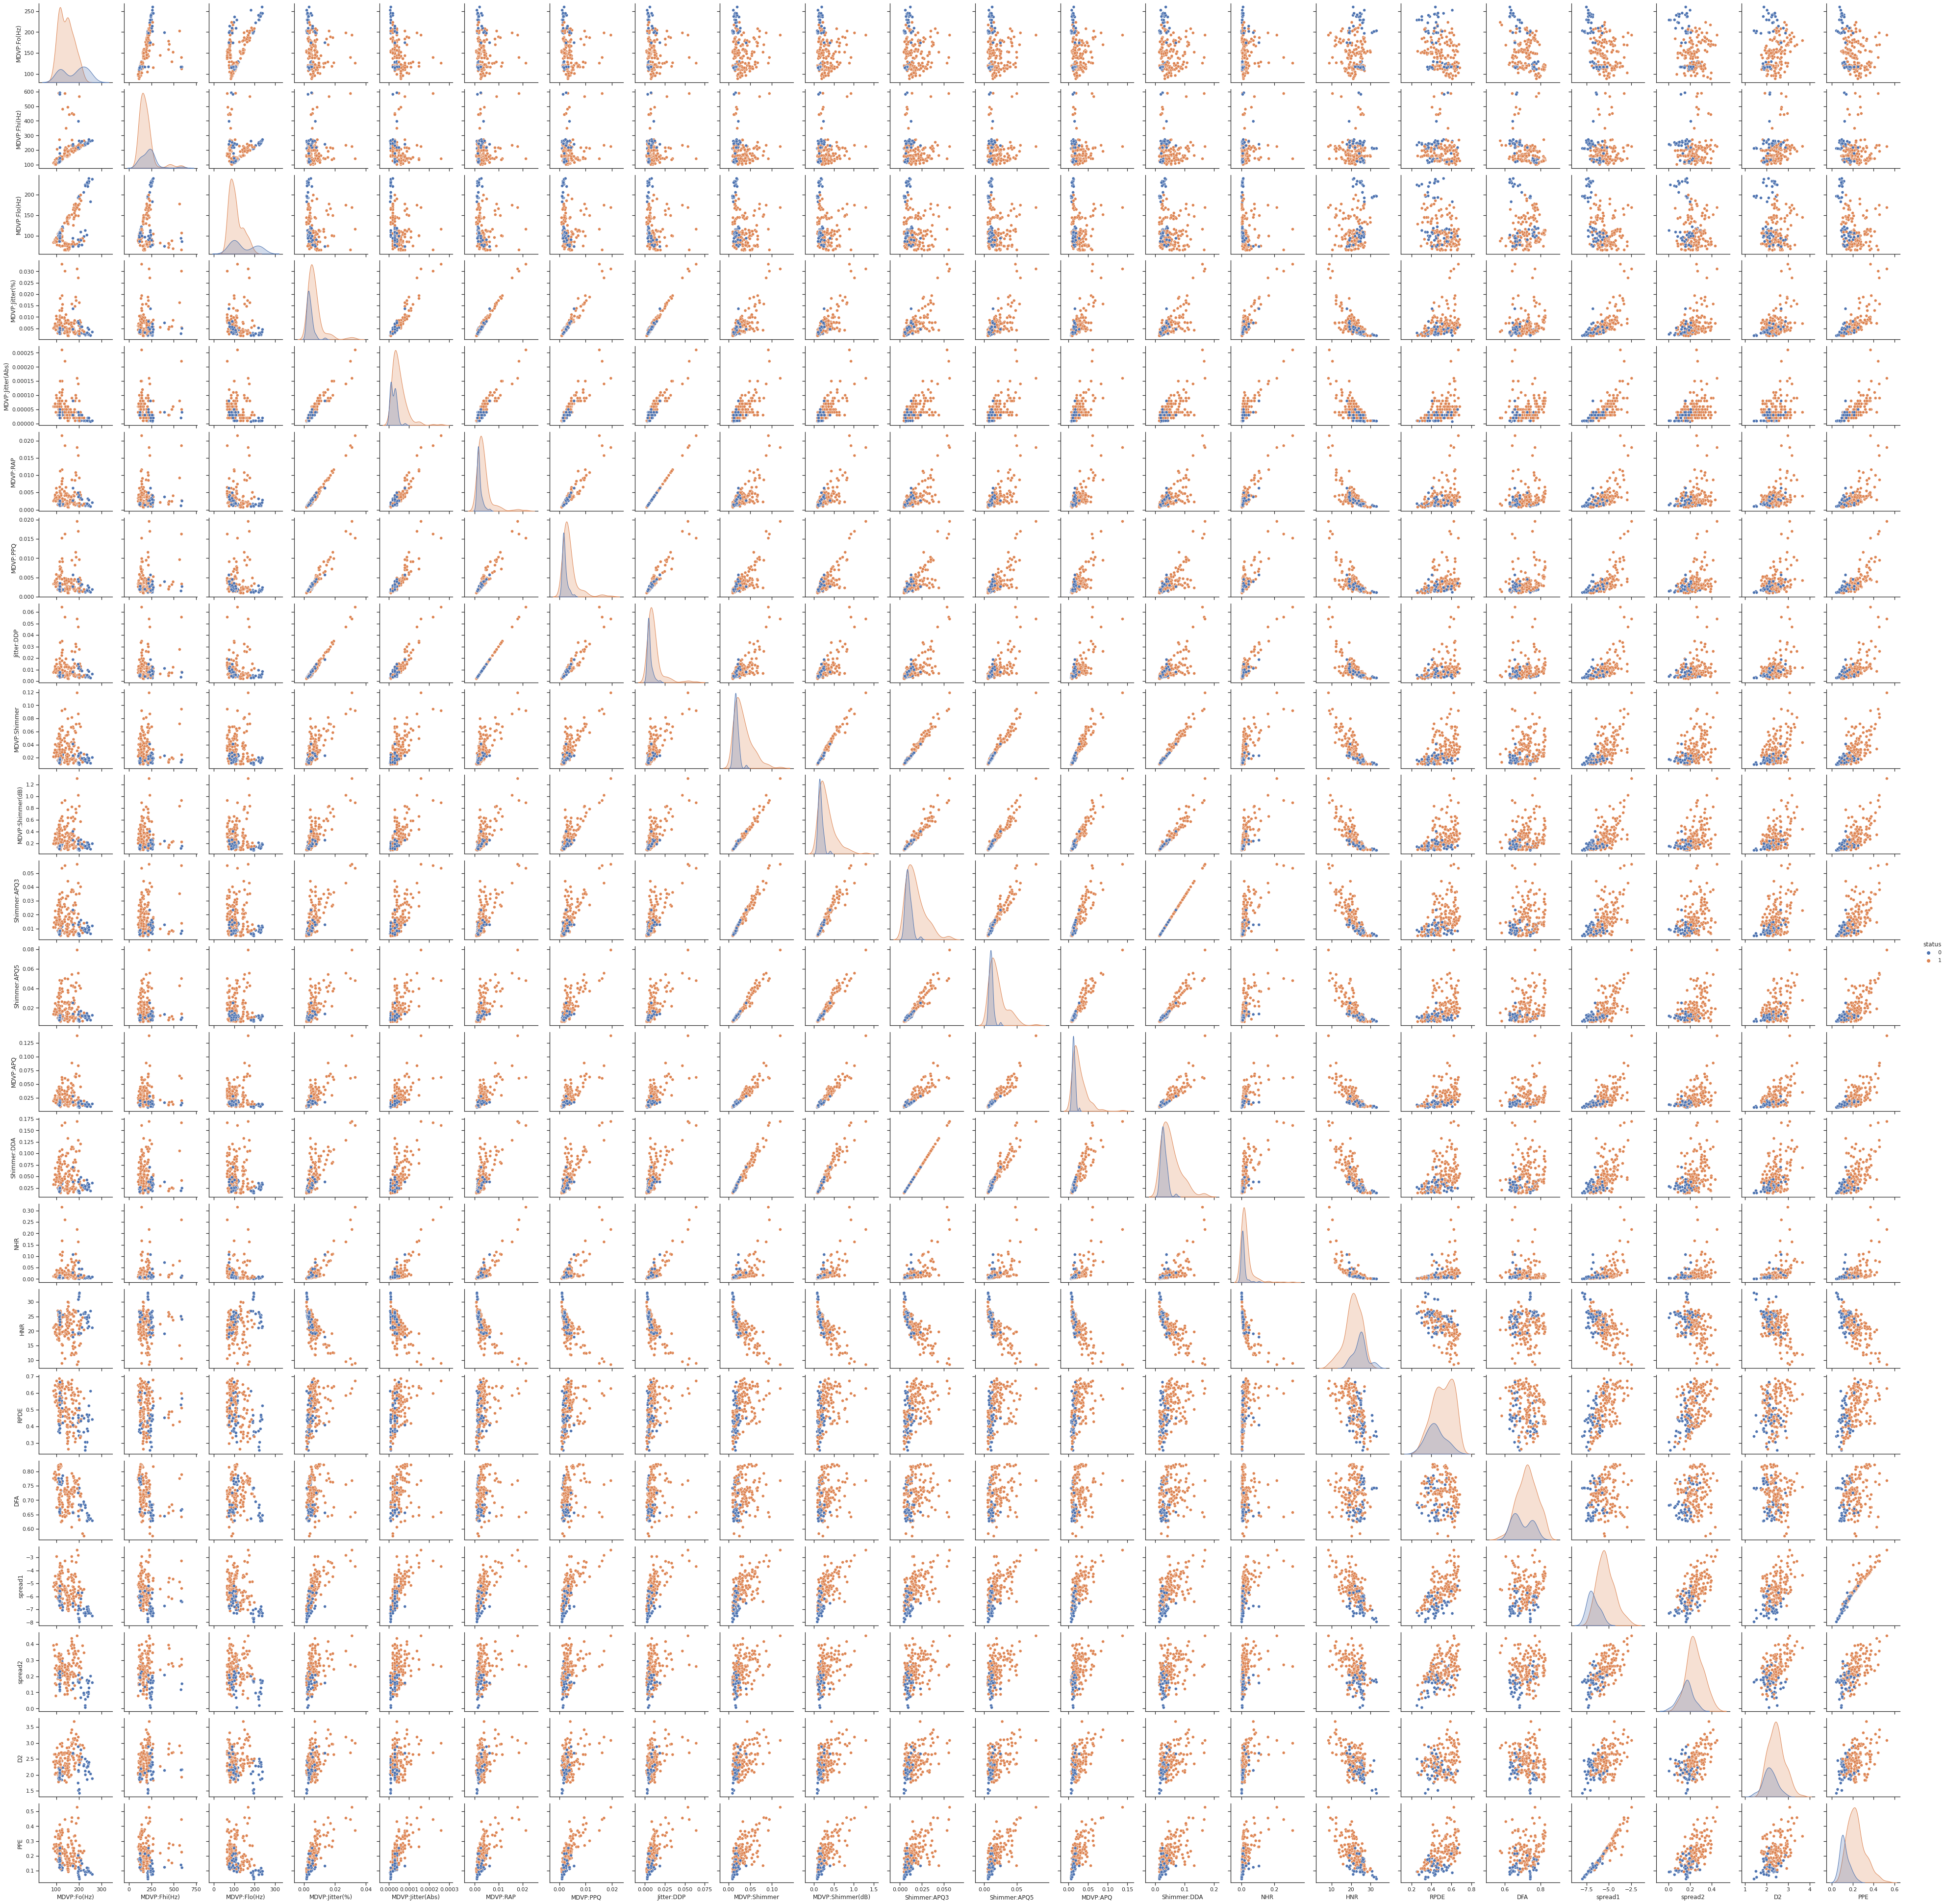

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="status")

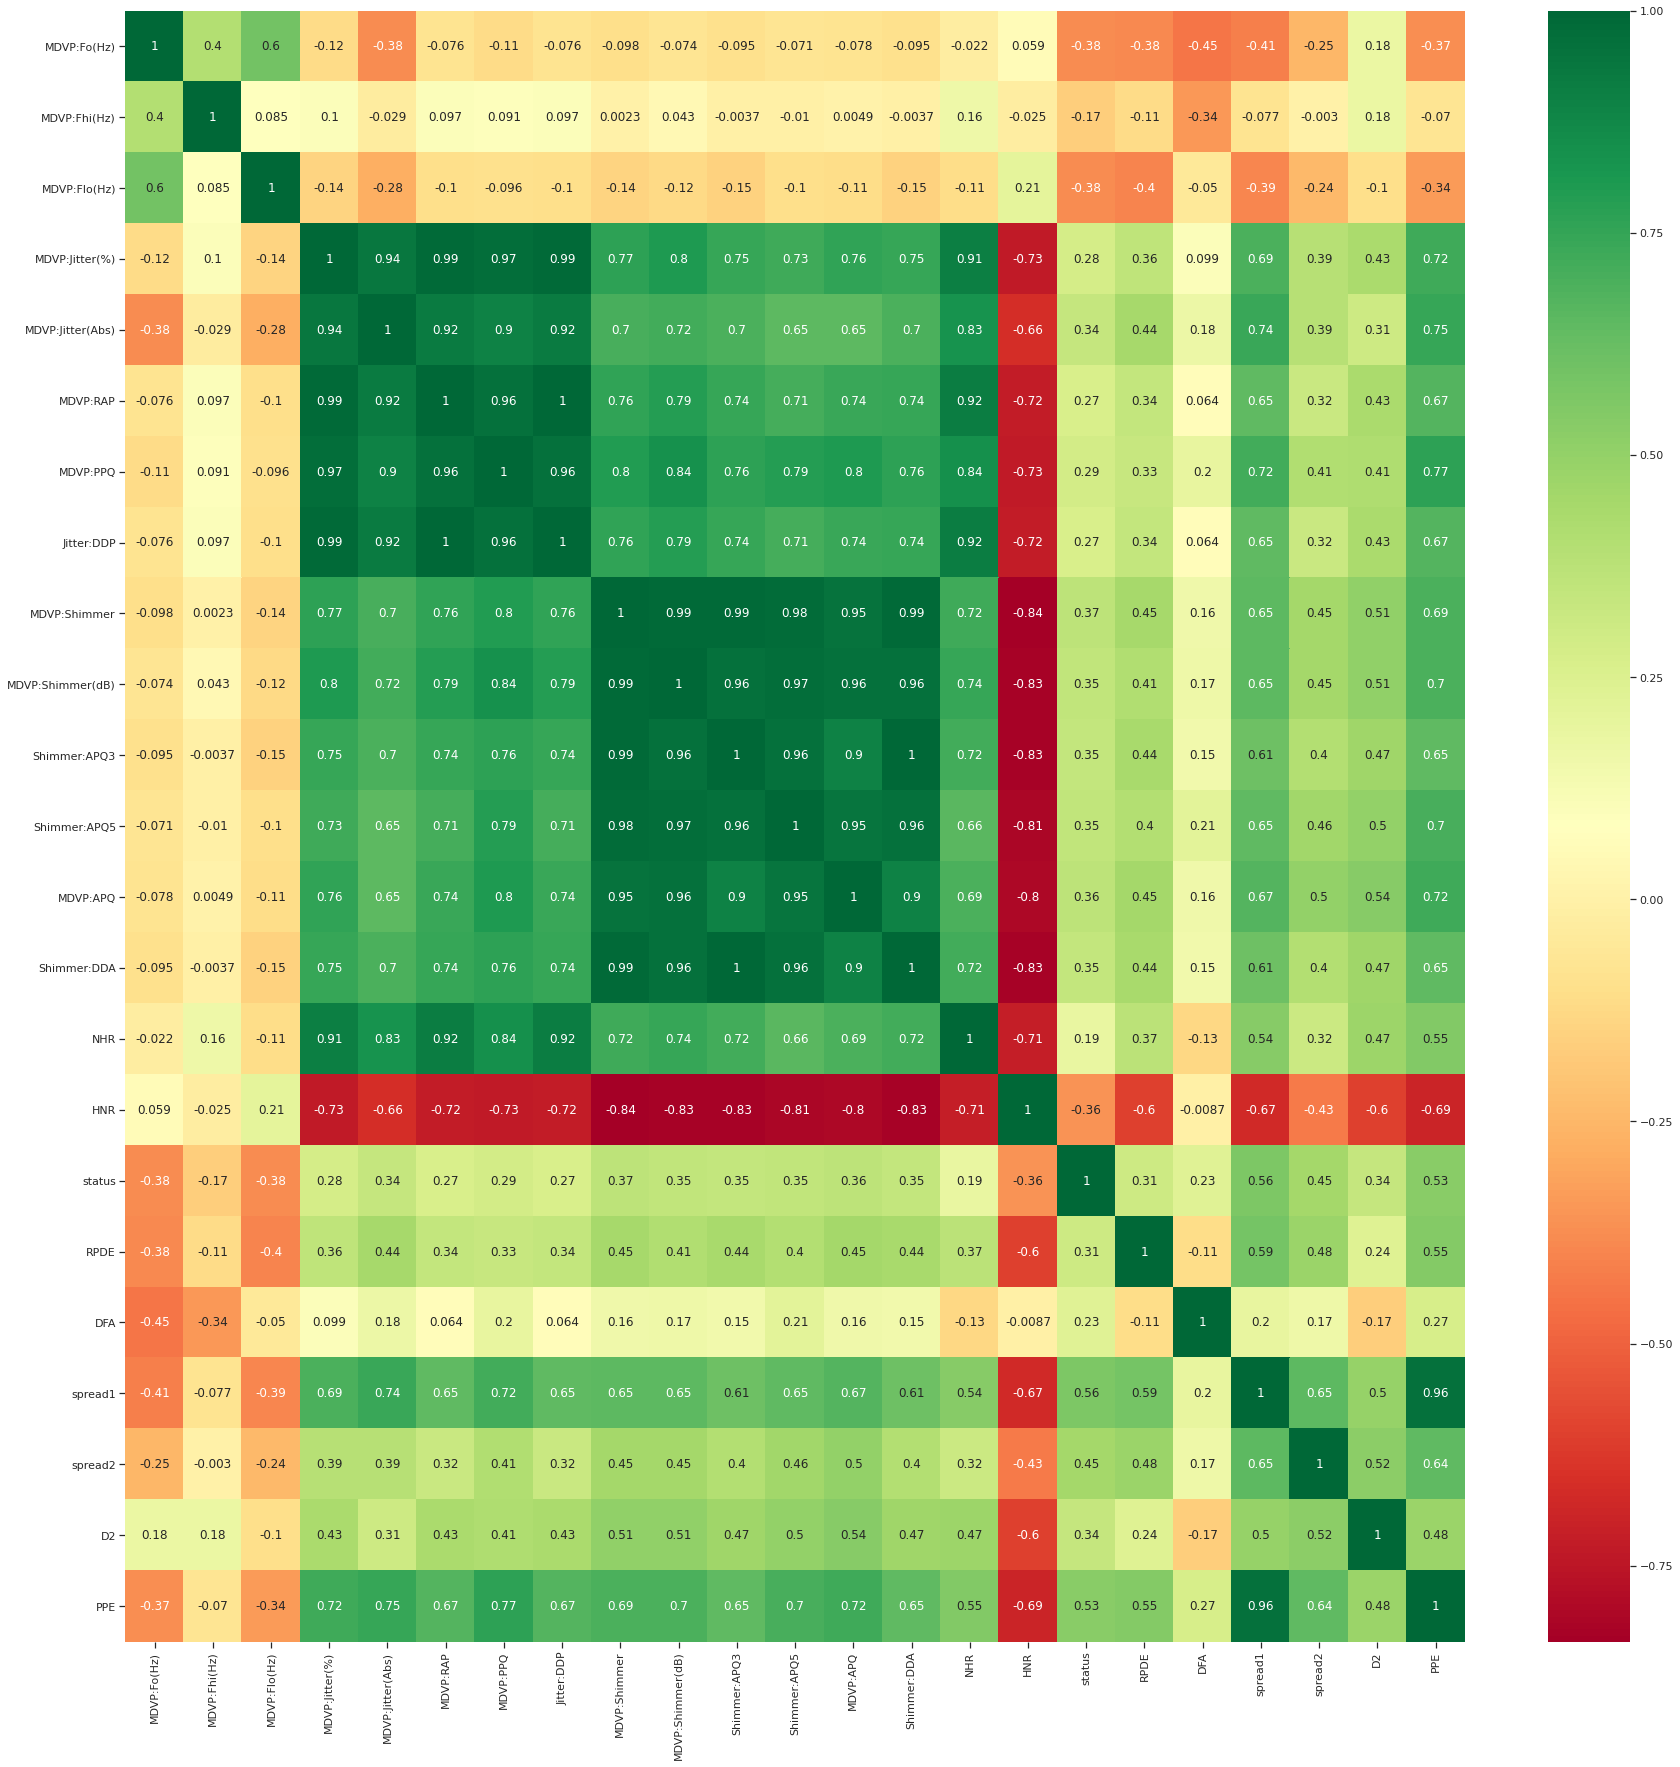

In [ ]:
plt.figure(figsize=(30,30))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

#### Splitting Data

In [3]:
# list of features with a corresponding list of target values (status column)

target = df_copy.pop('status')
df_copy.pop('name')

# from looking at description of columns, it shows values need
# to be normalised, such that all feature values are on the same scale
df_copy = ((df_copy - df_copy.min())/(df_copy.max()-df_copy.min()))

In [4]:
#splitting datasets, 80% traning and 20% testing, with shuffle since it was 
# shown that class distribution is uneven
x_train, x_test, y_train, y_test = train_test_split(df_copy, target, shuffle=True,
                                             random_state=15, train_size = 0.8,
                                              stratify=target)

###Classification

In [13]:
#
# Function: FindResults
# parameters;
#   labels: string list of classifier names 
#   classifiers: list of actual classifier models
#   x_train, y_train: feature and target training data
#   x_test, y_test: feature and target test data
# returns;
#   two arrays: one of training cross validation scores and
#   the other is predicition accuracy on test data for each 
#   given classifier 
#
def FindResults(labels, classifiers, x_train, y_train, x_test, y_test):

  train_score=np.array([])
  test_score=np.array([])

  for clf, label in zip(classifiers, labels):
    
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
      scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=cv)
      #print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
      train_score = np.append(train_score,scores.mean())
      #bst_tr_err=y_train==bstlfy.predict(x_train)
      #train_score = np.append(train_score, bst_tr_err)

      predict_scores = accuracy_score(y_test,clf.predict(x_test))
      #print("Predict on test data: %0.3f" % predict_scores)
      test_score = np.append(test_score,  predict_scores)
      #bst_tst_err=y_test==bstlfy.predict(x_test)
      #test_score= np.append(test_score,  bst_tst_err)
  
  return train_score, test_score;
#
# Function: Chart_ROC
# parameters;
#   labels: string list of classifier name 
#   classifier: classifier models
# returns;
#   ROC Chart with title 'label'
#
def Chart_ROC (label, classifier):

  y_pred_proba = classifier.predict_proba(x_test)[:,1]

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr)
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title(label)
  plt.show()

  print('\n ROC Score: %0.3f'%roc_auc_score(y_test, classifier.predict_proba(x_test)[:,1]))
#
# Function: Evaluate_Model
# parameters;
#   classifier: classifier models to be evaluated
# returns;
#   - cross-validation training score
#   - prediction of test accuracy score
#   - a classification report 
#
def Evaluate_Model(classifier):

  cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

  scores = cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=cv)
  print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

  predict_scores = accuracy_score(y_test, classifier.predict(x_test))
  print("Predict on test data: %0.3f" % predict_scores)

  print("\n Classification report  \n %s" %\
      (classification_report(y_test, classifier.predict(x_test))))
#
# Function: Confusion_Matrix
# parameters;
#   classifier: classifier models to be evaluated
# returns;
#  a confusion matrxi of predictions on test data
#
def Confusion_Matrix(classifier):

  y_pred = classifier.predict(x_test)

  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
#
# Function: ChartResults
# parameters;
#   labels: string list of classifier names 
#   classifiers: list of actual classifier models
#   x_train, y_train: feature and target training data
#   x_test, y_test: feature and target test data
# returns;
#   barchart of training and test scores of each
#   classifier, with label and legend
#
def ChartResults (labels, training_scores, testing_scores):

  fig, ax = plt.subplots(figsize=[25,6])

  x = np.arange(len(labels)) 
  
  rects1 = ax.bar(x - 0.35/2, training_scores, 0.35, label='Training score',\
                  color='#f6335f')
  rects2 = ax.bar(x + 0.35/2, testing_scores, 0.35, label='Test score',\
                  color='#f6a45f')

  ax.set_xticks(x)
  ax.set_xticklabels(labels)   
  ax.legend(loc='lower left')
  ax.set_ylim([0.0, 1.05])
  plt.minorticks_on()
  plt.grid(axis= 'y', linestyle='--', which='both') 
  a = get_gridlines(ax.yaxis, 'minor')
  b = a[14]
  b.set_color('red') 
  plt.ylabel('% Accuracy')
  plt.title('Default Classifier Accuracies')

  plt.show()
#
# Function: get_gridlines
# parameters;
#   ax: axis, y or x
#   which: minor or major gridlines
# returns;
#   list of gridlne ticks
#
def get_gridlines(ax, which):
        if which == 'major':
            ticks = ax.get_major_ticks()
        if which == 'minor':
            ticks = ax.get_minor_ticks()

        return cbook.silent_list('Line2D gridline',
                                 [tick.gridline for tick in ticks])

In [ ]:
# Testing Classifiers with default parameters to compare performance on
# the dataset, from there, the best performers are selected and fine tuned
# till the best parameters are found

# First default classifiers are defined

bagging = BaggingClassifier(DecisionTreeClassifier(),  max_samples=0.6, max_features=0.6)
knc = KNeighborsClassifier(n_neighbors=2)
svc = SVC(gamma=.1, kernel='rbf', probability=True)

lr = LogisticRegression(random_state=1)
gnb = GaussianNB()

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=None)
abc = AdaBoostClassifier(n_estimators=100)
rfc = RandomForestClassifier(n_estimators=100, max_depth = None, min_samples_split =2,\
                             random_state =0, oob_score=True)

etc = ExtraTreesClassifier(n_estimators=100, max_depth=None)
dt = tree.DecisionTreeClassifier()
vc = VotingClassifier(estimators=[('lr', lr),  ('gnb', gnb), ('knn', knc),
                                  ('svc', svc),('dt', dt),('etc', etc),
                                  ('rfc', rfc), ('abc', abc),('gbc', gbc)],
                       voting='hard')
rc = RidgeClassifier()

# The all classifiers are trained on the training data

knc.fit(x_train, y_train)
svc.fit(x_train, y_train)
vc.fit(x_train, y_train)

lr.fit(x_train, y_train)
gnb.fit(x_train, y_train)
bagging.fit(x_train, y_train)

dt.fit(x_train, y_train)
etc.fit(x_train,y_train)
rfc.fit(x_train, y_train)

abc.fit(x_train, y_train)
gbc.fit(x_train, y_train)
rc.fit(x_train, y_train)

In [ ]:
# Finding and plotting results

labels = ['K Neighbors', 'SVC','Voting Classifier', 
          'Logistic Regression', 'GaussianNB', 'Bagging Classifier',
          'Decision Tree', 'Extra Tree', 'Random Forest',
          'Ada Boost', 'Gradient Boost', 'Ridge Classifier']

classifiers = [knc, svc, vc, lr, gnb, bagging, dt, etc, rfc, abc, gbc, rc]

TRNS, TSTS = FindResults(labels, classifiers, x_train, y_train, x_test, y_test)

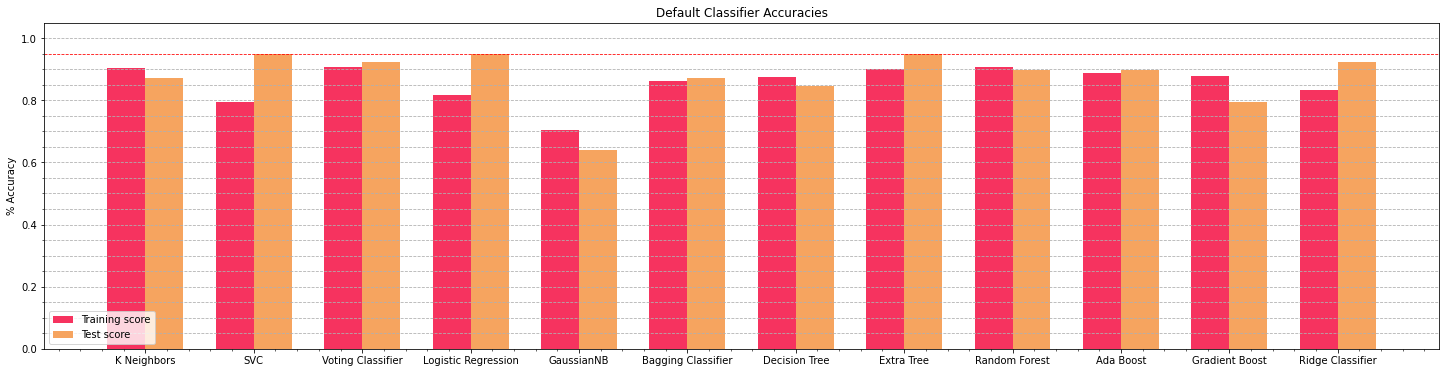

In [ ]:
ChartResults(labels, TRNS, TSTS)

As the red dotted line indicates the 95% accuracy benchmark, a few classifiers already reach that level of accuracy. A few are close, and may reach 95% with more paramter tuning. Best performing classifiers are: SVC, Logistic Regression, Extra Tree. Second best: K-Neighbours, Voting Classifier, Bagging, Random Forest, Ada Boost, Ridge Classifier.

### SVM

Starting with SVM, the default SVM classifier scored close to 95%. To fine tune the parameters and to achieve a higher score, a grid search is done with the parameters, and the best performer is identified. 

In [ ]:
# Parameters to vary during grid search
Cs = [100.0, 10.0, 1.0, 0.1, 0.001]
degrees = [0, 1, 2, 3, 4, 5, 6]
gammas = np.logspace(-2, 2, 15)
ker = ['linear', 'rbf', 'poly']
#, 'sigmoid','poly', 'linear']

# Evaluation method during grid search
scoring = ['accuracy']
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Identify model and begin grid search
modelSVM = svm.SVC()
gridSVM = dict(C=Cs, gamma=gammas, degree=degrees, kernel=ker)
grid_searchSVM = GridSearchCV(estimator=modelSVM, \
                   param_grid=gridSVM,
                   scoring=scoring,
                   refit='accuracy',
                   cv=cv,
                   n_jobs=-1)

# Train data to find best scoring classifier with the best performing parameters
grid_searchSVM.fit(x_train, y_train)
print(grid_searchSVM.best_score_)
grid_searchSVM.best_estimator_

0.9557575757575757


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma=7.196856730011514,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Logistic Regression

Now with Logistic Regression, the default LR classifier training score was 95%. To fine tune the parameters and to achieve a higher score, a grid search is done with the parameters, and the best performer is identified. However, after the grid search the tuned parameters don't preform better than the default LR classifier. Due to the increased number of parameters, it also takes a long time to execute.

In [ ]:
# Parameters to vary during grid search
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'none']
penalty = ['l2', 'l1', 'none']
c_values = [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]

# Evaluation method during grid search
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Identify model and begin grid search
modelLR = LogisticRegression()
gridLR = dict(solver=solvers, penalty=penalty, C=c_values)
grid_searchLR = GridSearchCV(estimator=modelLR, param_grid=gridLR, n_jobs=-1, cv=cv,
                           scoring='accuracy', error_score=0)

# Train data to find best scoring classifier with the best performing parameters
grid_searchLR.fit(x_train, y_train)
print(grid_searchLR.best_score_)
grid_searchLR.best_estimator_

0.8503030303030303


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Random Forest

The Random Forest Classifier default parameters score about 90%. There is room for improvement, so the parameters are fine tuned using a grid search to achieve a higher score. The best parameters are identified. However, after the grid search the tuned parameters don't preform much better than the default LR classifier. Scoring very close to the default classifier, and 5% less than the threshold of 95%. Due to the increased number of parameters, it also takes a long time to execute. One parameter is varied through the search at a time to take less time. When a best classifier parameters are identified, another parameter is varied, and so on. 

In [ ]:
# Parameters to vary during grid search
max_features = ['sqrt']
#, 'log2']
n_estimators = [500]
# [100, 300, 500, 800, 1000]
max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

# Evaluation method during grid search
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Identify model and begin grid search
modelRF = RandomForestClassifier()
gridRF = dict(n_estimators = n_estimators,
            #max_depth = max_depth,  
            #min_samples_split = min_samples_split, 
            #min_samples_leaf = min_samples_leaf,
            max_features=max_features)
#)
grid_searchRF = GridSearchCV(estimator=modelRF, param_grid=gridRF, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)

# Train data to find best scoring classifier with the best performing parameters
grid_searchRF.fit(x_train, y_train)
print(grid_searchRF.best_score_)
grid_searchRF.best_estimator_

0.9038383838383836


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Extra Trees

The Extra Trees Classifier default parameters score about 95%. The parameters are fine tuned using a grid search to achieve a higher score or maintain the 95% more consistently. The best parameters are identified. However, after the grid search, with the tuned parameters the classifier performs worse than the default parameters.

In [ ]:
# Parameters to vary during grid search
n_trees = [10, 20, 25, 30, 35, 40, 50]
i = range(1, 21)

# Evaluation method during grid search
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Identify model and begin grid search
modelET = ExtraTreesClassifier()
gridET = dict(n_estimators=n_trees,max_features=i)
grid_searchET = GridSearchCV(estimator=modelET, param_grid=gridET, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)

# Train data to find best scoring classifier with the best performing parameters
grid_searchET.fit(x_train, y_train)
print(grid_searchET.best_score_)
grid_searchET.best_estimator_

0.9294949494949494


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=4,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

### Bagging 

Bagging Decision Tree Classifiers helps improve accuracy. In this instance the number of estimators and maximum leaf nodes for each tree is varied. The default parameters score about 90%. The accuracy results are plotted across the 2 variables. The best parameters are identified on the x axis and by the color of the plotted line, at the highest achieved accuracy. 

In [ ]:
clf=DecisionTreeClassifier(max_features=None)
clf=clf.fit(x_train,y_train)
train_error=y_train==clf.predict(x_train)
test_error=y_test==clf.predict(x_test)

results=pd.DataFrame([],columns=list(['type','n_leaf','n_est',\
    'train_acc','test_acc']))

# Train bagging ensemble on iterations of n_estimators=i
# and iterations of max_leaf_nodes=j
max_n_ests=60
for j in [500,2000,8000,99999]:
    clf_stump=DecisionTreeClassifier(max_features=None,max_leaf_nodes=j)
    for i in np.arange(1,max_n_ests):
        baglfy=BaggingClassifier(base_estimator=clf_stump,n_estimators=i,
            max_samples=1.0)
        baglfy=baglfy.fit(x_train,y_train)
        bag_tr_err=y_train==baglfy.predict(x_train)
        bag_tst_err=y_test==baglfy.predict(x_test)
        run_rslt=pd.DataFrame([['bag',j,i,sum(bag_tr_err)/len(bag_tr_err),
            sum(bag_tst_err)/len(bag_tst_err)]],
            columns=list(['type','n_leaf','n_est','train_acc','test_acc']))
        results=results.append(run_rslt)

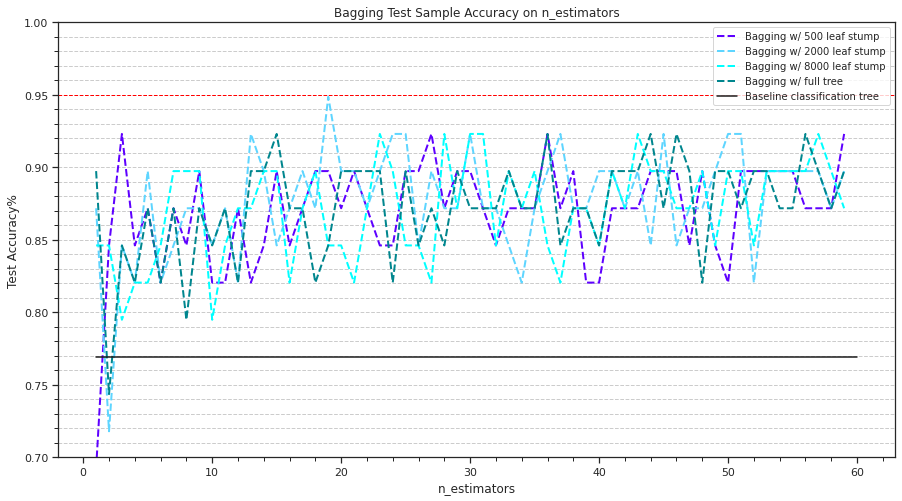

In [ ]:
# Plot Bagging accuracy results on test data
#plt.figure(figsize=[15,8])
fig, ax = plt.subplots(figsize=[15,8])

# 500 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==500)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#5e00ff', \
    label='Bagging w/ 500 leaf stump')
# 2000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==2000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#5ed5ff', \
    label='Bagging w/ 2000 leaf stump')
# 8000 leaf stumps
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==8000)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#00ffff', \
    label='Bagging w/ 8000 leaf stump')
# Full Classification Trees (no early termination)
plt.plot(results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['n_est']],results.loc[((results.type=='bag')&(results.n_leaf==99999)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#00868e', \
    label='Bagging w/ full tree')
# Plot test accuracy of baseline classification tree
clf_test_acc=sum(test_error)/len(test_error)
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')

plt.legend(fontsize=10)
plt.title('Bagging Test Sample Accuracy on n_estimators')
plt.ylim([0.7, 1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both')   
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')

# Identify 95% line
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 

plt.show()

As the red dotted line indicates the 95% accuracy benchmark, the accuracy fluctuates many times, so it will be difficult to replicate the resulting accuracy with the parameters on this graph. 95% is reached but only at one point. Since the accuracy is inconsistent at these points in the graph, this is considered the limit of accuracy to be achieved by Bagging. The point at 95% has number of estimators at 16-20, and the leaf nodes at 2000. When these parameters are used, as below, the accuracy is not close to 95%.

In [ ]:
BaggingTree =DecisionTreeClassifier(max_features=None,max_leaf_nodes=2000)
Bagging=BaggingClassifier(base_estimator=BaggingTree,n_estimators=17,max_samples=1.0)

Bagging.fit(x_train, y_train)
Evaluate_Model(Bagging)

Accuracy: 0.891 (+/- 0.089)
Predict on test data: 0.897

 Classification report  
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



### Ada Boosting

The Ada Boost default parameters score about 90%. The parameters are fine tuned to achieve a higher score. The number of estimators and the learning rate are varied, the accuracy is plotted, and the best parameters are read off the x-axis and the color of the line. 

In [ ]:
clf=DecisionTreeClassifier(max_features=None)
clf=clf.fit(x_train,y_train)
train_error=y_train==clf.predict(x_train)
test_error=y_test==clf.predict(x_test)

max_n_ests=60

results=pd.DataFrame([],columns=list(['type','l_r','n_est', \
                  'train_acc','test_acc']))

# Train boosting ensemble on iterations of n_estimators=i 
# and learning rate 0.5-1

for i in np.arange(1, max_n_ests):
  for j in [0.5,0.6,0.7,0.8,0.9,1]:
    bstlfy=AdaBoostClassifier(n_estimators=i, learning_rate = j)
    bstlfy=bstlfy.fit(x_train, y_train)
    bst_tr_err=y_train==bstlfy.predict(x_train)
    bst_tst_err=y_test==bstlfy.predict(x_test)
    run_rslt=pd.DataFrame([['bst',j,i,sum(bst_tr_err)/len(bst_tr_err),
          sum(bst_tst_err)/len(bst_tst_err)]],
    columns=list(['type','l_r','n_est','train_acc','test_acc']))
    results=results.append(run_rslt)

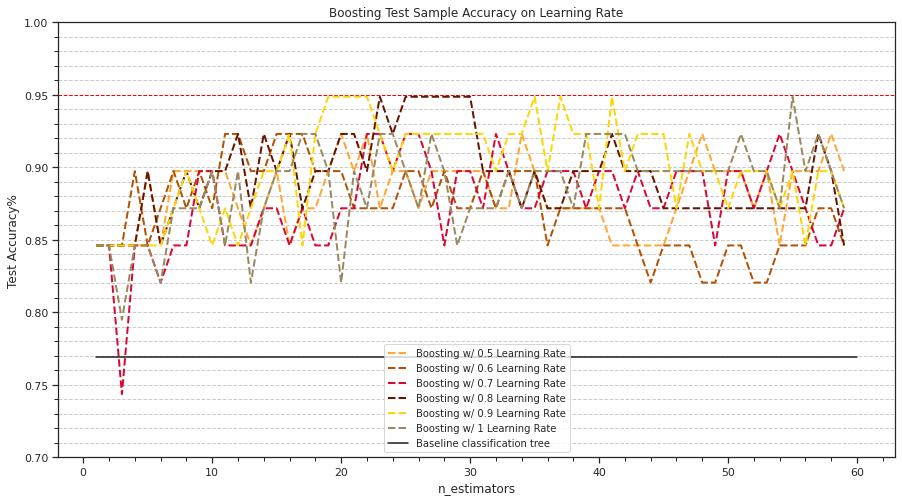

In [ ]:
# Plot Boosting accuracy results on test data
fig, ax = plt.subplots(figsize=[15,8])

# 0.5 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.5)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.5)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#ffa634', \
    label='Boosting w/ 0.5 Learning Rate')

# 0.6 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.6)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.6)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#b25202', \
    label='Boosting w/ 0.6 Learning Rate')

# 0.7 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.7)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.7)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#da0734', \
    label='Boosting w/ 0.7 Learning Rate')

# 0.8 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.8)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.8)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#661400', \
    label='Boosting w/ 0.8 Learning Rate')

# 0.9 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==0.9)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==0.9)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#fed606', \
    label='Boosting w/ 0.9 Learning Rate')

# 1 Learning Rate
plt.plot(results.loc[((results.type=='bst')&(results.l_r==1)), \
    ['n_est']],results.loc[((results.type=='bst')&(results.l_r==1)), \
    ['test_acc']],linestyle='--',linewidth=2,color='#98895f', \
    label='Boosting w/ 1 Learning Rate')

# Plot test accuracy of baseline classification tree
plt.plot([1,max_n_ests],[clf_test_acc,clf_test_acc],color='k', \
    label='Baseline classification tree')

plt.legend(fontsize=10)
plt.title('Boosting Test Sample Accuracy on Learning Rate')
plt.ylim([0.7,1.0])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')

# Identify the 95% line
a = get_gridlines(ax.yaxis, 'major')
b = a[5]
b.set_color('red') 


plt.show()

As the red dotted line indicates the 95% accuracy benchmark, the value doesn't
fluctuate or reach 95% at only one point between n_esimators 27-30 with learning rate 0.8 and between 18-22 with learning rate 0.9. Since the accuracy is consistent at these points in the graph, these values are chosen as the most
optimal paramters for AdaBoosting. 

### KNN

The KNN default classifier scored a little above 90%. The most important parameter for KNN is the number of neighbours to be used. Two methods are used to fine the most suitable value. The first is simply going through a range from 1 to 15 and plotting the accuracy value. The second is a grid search as done before, with the number of neighbours as the varying parameter. Both result in 1 being the optimal parameter, scoring 95% or higher.

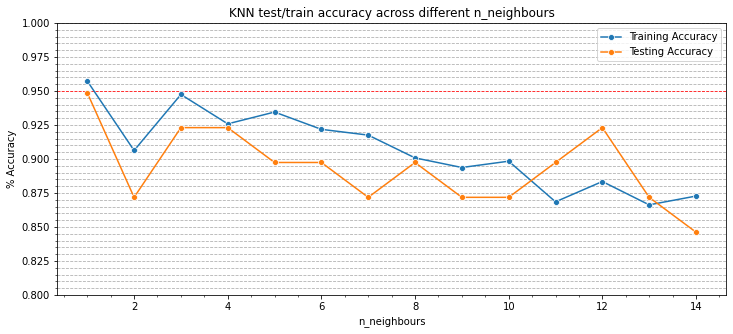

In [ ]:
train_score=np.array([])
test_score=np.array([])

for n in range(1,15):

    KNN = KNeighborsClassifier(n_neighbors = n)
    KNN.fit(x_train,y_train)

    cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

    train_score = np.append(train_score, cross_val_score(KNN, x_train, y_train, scoring='accuracy', cv=cv).mean())

    test_score = np.append(test_score, accuracy_score(y_test, KNN.predict(x_test)))

fig, ax = plt.subplots(figsize=[12,5])
plt.minorticks_on()
plt.grid(axis= 'y', linestyle='--', which='both') 
plt.ylim([0.8, 1.0])
plt.ylabel('% Accuracy')
plt.xlabel('n_neighbours')
plt.title('KNN test/train accuracy across different n_neighbours')
plot = sns.lineplot(x=range(1,15),y=train_score,marker='o',label='Training Accuracy')
plot = sns.lineplot(x=range(1,15),y=test_score,marker='o',label='Testing Accuracy')
a = get_gridlines(ax.yaxis, 'major')
b = a[6]
b.set_color('red') 

As the red dotted line indicates the 95% accuracy benchmark, the value of k 
on the x-axis that meets that line is 1. This value is chosen as the most
optimal paramter.

In [ ]:
# Varying parameter
param_grid = {'n_neighbors':np.arange(1,50)}

#Identify model and evaluation method
knn = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Begin grid search and training
knn_cv= GridSearchCV(knn,param_grid,cv=cv)
knn_cv.fit(x_train,y_train)

# Show best accuracy and best parameters
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_)) 

Best Score:0.9573737373737373
Best Parameters: {'n_neighbors': 1}


### Gradient Boosting

Default Gradient Boost did not score very high, however with fine tuing in the form of a grid search it may yield more accurate results. After tuing parameters, it did score higher than the default. Although the accuracy is too low for the required benchmark.

In [11]:
# Varying parameters
n_estimators = [10, 100, 1000]
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# Evaluation method during grid search
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Identify model and begin grid search
modelGB = GradientBoostingClassifier()
gridGB = dict(learning_rate=learning_rate,
              n_estimators=n_estimators, 
              subsample=subsample,
              max_depth=max_depth)
grid_searchGB = GridSearchCV(estimator=modelGB, param_grid=gridGB, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)


# Train data to find best scoring classifier with the best performing parameters
grid_searchGB.fit(x_train, y_train)
print(grid_searchGB.best_score_)
grid_searchGB.best_estimator_

0.9317171717171716


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Ridge Classifier

The final classifier to look at is the Ridge Classifier. The default classifier's score is close to 95%. Fine tuing the parameters in a grid search should yield a more accurate result. After tuing parameters, it did not score higher than the default. The only parameter to vary is alpha. 

In [ ]:
# Define varying parameters
alpha = [0.0001, 0.001,0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Evaluation method during search
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# Define grid, model, and grid search
gridRC = dict(alpha=alpha)
modelRC = RidgeClassifier()
grid_searchRC = GridSearchCV(estimator=modelRC, param_grid=gridRC, n_jobs=-1,
                           cv=cv, scoring='accuracy',error_score=0)

# Print best accuracy and best parameters 
grid_searchRC.fit(x_train, y_train)
print(grid_searchRC.best_score_)
grid_searchRC.best_estimator_

0.8614141414141414


RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001)

### NN

In [ ]:
parameters = {'solver': ['lbfgs'],
              'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ],
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.best_params_)

0.9871794871794872
{'alpha': 0.1, 'hidden_layer_sizes': 11, 'max_iter': 1000, 'random_state': 6, 'solver': 'lbfgs'}


### Best Scores
The best parameters and classifiers are all trained evaluated seprately using optimal parameters found above. A classification report is presented, showing accuracy, recall, and the F1 value. For each classifier, a confusion matrix and an ROC chart is shown. 

#### Best Classsifier 1: SVM

In [18]:
best1= SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=0, gamma=7.196856730011514,
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
best1.fit(x_train, y_train)

Evaluate_Model(best1)

Accuracy: 0.956 (+/- 0.055)
Predict on test data: 0.923

 Classification report  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



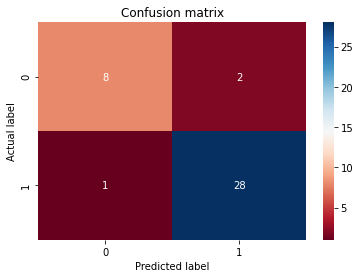

In [19]:
Confusion_Matrix(best1)

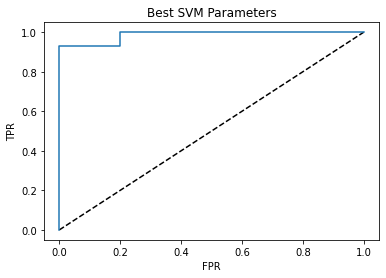


 ROC Score: 0.986


In [20]:
Chart_ROC('Best SVM Parameters',best1)

#### Best Classsifier 2: Logistic Regression

In [21]:
best2 = LogisticRegression(C=10, penalty='l1', solver='liblinear')
best2.fit(x_train, y_train)

Evaluate_Model(best2)

Accuracy: 0.842 (+/- 0.085)
Predict on test data: 0.897

 Classification report  
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



In [22]:
# Compared to default vaulues 
best20 = LogisticRegression(random_state=1)
best20.fit(x_train, y_train)

Evaluate_Model(best20)

Accuracy: 0.821 (+/- 0.087)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



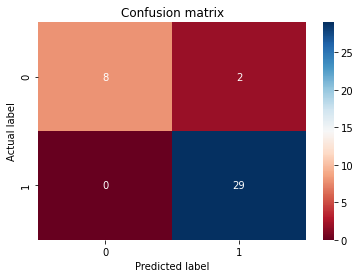

In [23]:
Confusion_Matrix(best20)

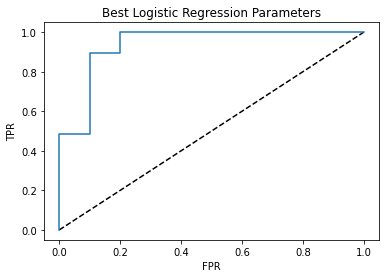


 ROC Score: 0.938


In [24]:
Chart_ROC('Best Logistic Regression Parameters', best2)

#### Best Classsifier 3: Ada Boost

In [25]:
best3 = AdaBoostClassifier(n_estimators=20, learning_rate = 0.9)
best3.fit(x_train, y_train)

Evaluate_Model(best3)

Accuracy: 0.864 (+/- 0.085)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



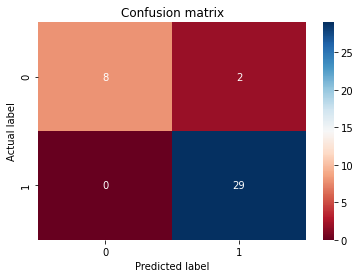

In [26]:
Confusion_Matrix(best3)

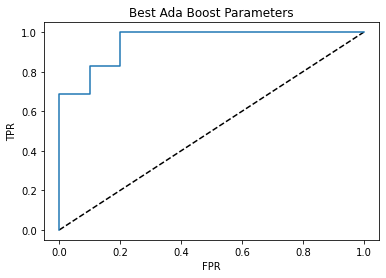


 ROC Score: 0.952


In [27]:
Chart_ROC('Best Ada Boost Parameters', best3)

#### Best Classsifier 4: KNN

In [28]:
best4 = KNeighborsClassifier(1)
best4.fit(x_train,y_train)

Evaluate_Model(best4)

Accuracy: 0.957 (+/- 0.056)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



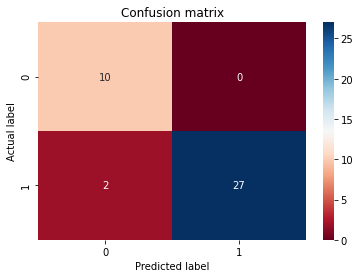

In [29]:
Confusion_Matrix(best4)

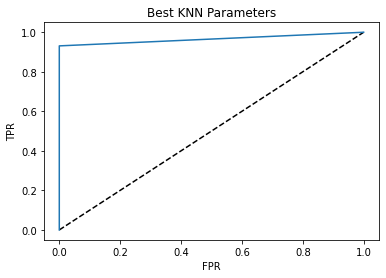


 ROC Score: 0.966


In [30]:
Chart_ROC('Best KNN Parameters', best4)

#### Best Classifier 5: Extra Tree

In [31]:
best5 = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=4,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
best5.fit(x_train, y_train)

Evaluate_Model(best5)

Accuracy: 0.917 (+/- 0.077)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



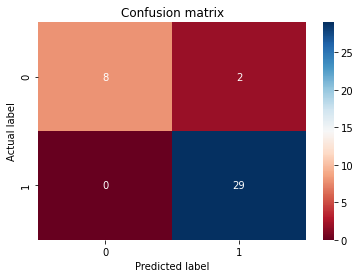

In [32]:
Confusion_Matrix(best5)

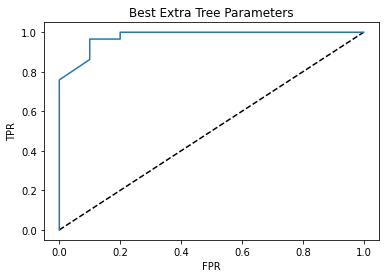


 ROC Score: 0.978


In [33]:
Chart_ROC('Best Extra Tree Parameters', best5)

#### Best Classifier 6: Random Tree

In [34]:
best6= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best6.fit(x_train, y_train)

Evaluate_Model(best6)

Accuracy: 0.911 (+/- 0.079)
Predict on test data: 0.923

 Classification report  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



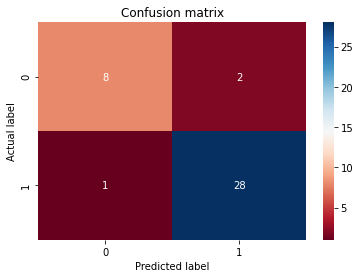

In [35]:
Confusion_Matrix(best6)

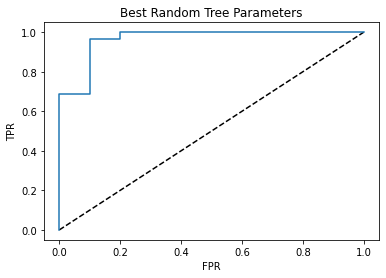


 ROC Score: 0.966


In [36]:
Chart_ROC('Best Random Tree Parameters',best6)

#### Best Classifier 7: Ridge Classifier

In [37]:
best7 = RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001)
best7.fit(x_train, y_train)

Evaluate_Model(best7)

Accuracy: 0.861 (+/- 0.099)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [38]:
defaultRC = RidgeClassifier()
defaultRC.fit(x_train, y_train)

Evaluate_Model(defaultRC)

Accuracy: 0.841 (+/- 0.084)
Predict on test data: 0.923

 Classification report  
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



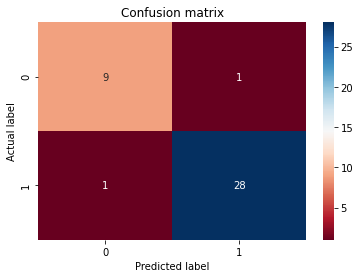

In [39]:
Confusion_Matrix(best7)

#### Best Classifier 8: Gradient Boosting

In [40]:
best8 = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best8.fit(x_train, y_train)

Evaluate_Model(best8)

Accuracy: 0.925 (+/- 0.073)
Predict on test data: 0.897

 Classification report  
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



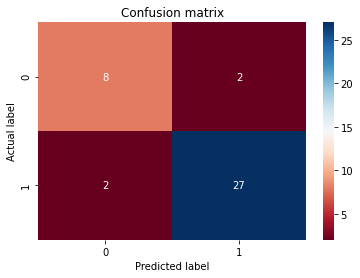

In [41]:
Confusion_Matrix(best8)

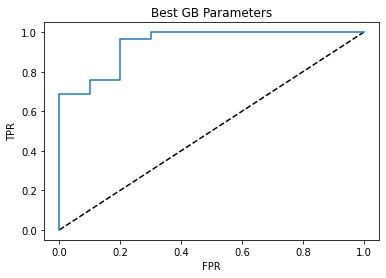


 ROC Score: 0.941


In [42]:
Chart_ROC('Best GB Parameters', best8)

#### Best Classifier 9: Neural Network

In [43]:
best9=MLPClassifier(alpha=0.1, hidden_layer_sizes=11,
                     max_iter=1000, random_state=6,
                     solver='lbfgs')

best9.fit(x_train, y_train)

Evaluate_Model(best9)

Accuracy: 0.919 (+/- 0.083)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



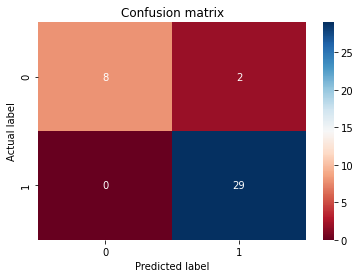

In [44]:
Confusion_Matrix(best9)

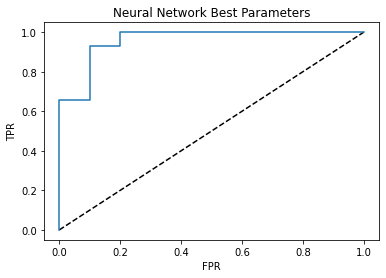


 ROC Score: 0.959


In [45]:
Chart_ROC('Neural Network Best Parameters', best9)

#### Best Classifier 10: Voting Classifier

In [46]:
best10 = VotingClassifier(estimators=[('svm', best1), ('lr', best2),
                                  ('adc', best3), ('knn', best4),
                                  ('etc', best5), ('rfc', best6),
                                  ('gb', best8),
                                  ('nn', best9)],
                       voting='soft')
best10.fit(x_train,y_train)

Evaluate_Model(best10)

Accuracy: 0.955 (+/- 0.063)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



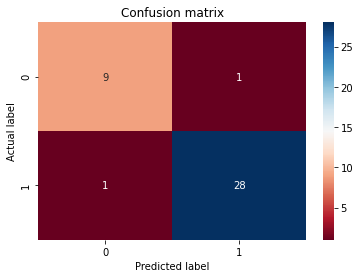

In [47]:
Confusion_Matrix(best10)

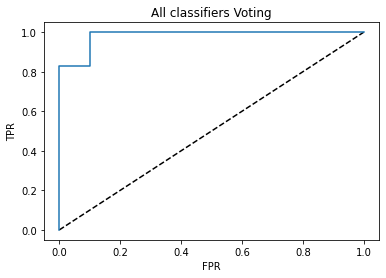


 ROC Score: 0.983


In [48]:
Chart_ROC('All classifiers Voting', best10)

Combining the most accurate classifiers into a single Voting Classifier

In [53]:
bestV = VotingClassifier(estimators=[('knn', best4), ('vc', best10)],
                                     #('svm', best1),
                                  #('adc', best3), ('knn', best4),
                                  #('etc', best5),
                                  #('nn', best9)],
                       voting='soft')
bestV.fit(x_train,y_train)

Evaluate_Model(bestV)

Accuracy: 0.957 (+/- 0.056)
Predict on test data: 0.949

 Classification report  
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



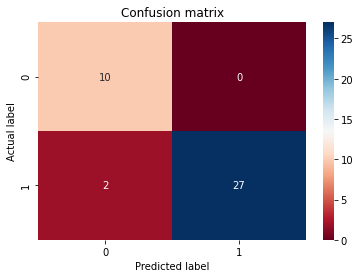

In [54]:
Confusion_Matrix(bestV)

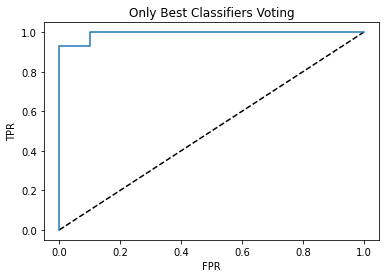


 ROC Score: 0.993


In [55]:
Chart_ROC('Only Best Classifiers Voting', bestV)